In [1]:
%matplotlib widget
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox

In [2]:
def pay_load(keyword):
    pytrends = TrendReq(hl='en-US', tz=360)
    kw_list = [keyword]
    tf = "today 12-m"
    pytrends.build_payload(kw_list, timeframe=tf)
    return pytrends
    
    
def get_iot(keyword):
    payload = pay_load(keyword)
    df = payload.interest_over_time()
    
    return df[keyword]
    

def submit(keyword):
    new_data = get_iot(keyword)
    l.set_ydata(new_data)
    #ax.set_ylim(new_data[keyword].min(), new_data[keyword].max())
    
    plt.draw()
    

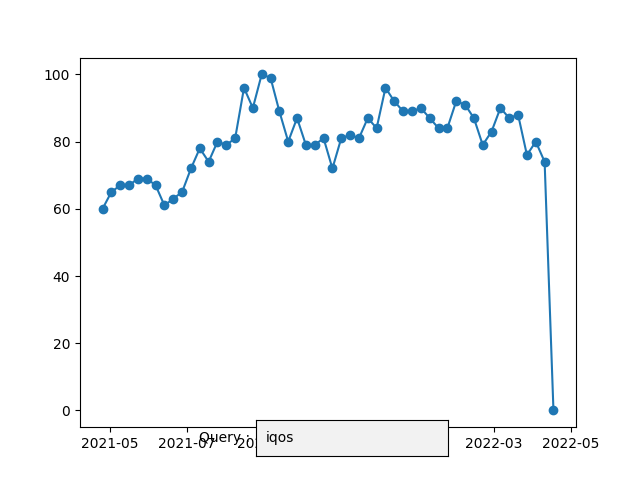

In [3]:
keyword = "iqos"
plotter = get_iot(keyword)

l, = plt.plot(plotter, marker="o")
#fig, ax = plt.subplots()

axbox = plt.axes([0.4, 0.05, 0.3, 0.075])
text_box = TextBox(axbox, 'Query : ',
    initial = keyword)
    
text_box.on_submit(submit)
plt.show()